## Data606 - Capstone Project
```
Group H
Malav Patel, Kent Butler
Prof. Unal Sokaglu
```

The project is about climate data analysis and performing time-series analysis.

# Research

### References

Some explanations of earth sciences statistics:
https://pjbartlein.github.io/REarthSysSci/ltms-and-anomalies.html

NOAA PSL NCEP-NCAR datasets:  https://psl.noaa.gov/data/gridded/data.ncep.reanalysis.html

NOAA PSL, other recognized data sources directory: https://psl.noaa.gov/data/help/othersources/

Global environmental policy timeline, https://www.boell.de/en/2022/05/28/international-environmental-policy-timeline

OECD convergence of policy, climate,and economy: https://www.oecd.org/

NASA climate time machine: https://climate.nasa.gov/interactives/climate-time-machine

### Factoids

* All of the plastic waste produced in the world in 2019 alone weighs as much as 35,000 Eiffel Towers – 353 million tons  - [*Organization for Economic Cooperation and Development (OECD)*](https://www.boell.de/en/2022/05/28/international-environmental-policy-timeline)



## Application Parameters

Note: algorithm tuning is done with declaration of the model.

In [ ]:
import pandas as pd
import datetime
from datetime import date

In [ ]:
debug = True

DRIVE_PATH = "/content/drive/MyDrive/data606"

# Set the location of this script in GDrive
SCRIPT_PATH = DRIVE_PATH + "/src/"

# Root Path of the data on the cloud drive
DATA_PATH = DRIVE_PATH + "/data/"

# Number of samples to work with - will be split  into train/test
SAMPLE_SIZE = 5000

# Ratio of test data to train data - used for split
TEST_RATIO = 0.3

# Device to run on
run_on_device =  'cpu' # 'cuda'

# Start including data from this date
START_DATE =  pd.to_datetime(date.fromisoformat('1950-01-01'))
# Stop including data after this date
END_DATE = pd.to_datetime(date.fromisoformat('2022-12-31'))


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd $SCRIPT_PATH

/content/drive/MyDrive/data606/src


In [ ]:
# Load util class
%run -i "./ProjectUtil.ipynb"

# Data Load

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.rcParams["figure.figsize"] = (10,6)
import warnings

In [ ]:
warnings.filterwarnings('ignore')
plt.style.use('seaborn')
%matplotlib inline

---

**Initial Data Load**

---

*NOTE:  Is there a way to build a re-usable data load and normalization routine? For at least the simple datasets? And would that be helpful.*

### Global Temperature Data


This is a set of global long-term average monthly temperatures in Celsius.

Derived from multiple sets of data from:

`Global Historical Climatology Network (GHCN2), Peterson and Vose, 1997); the Atmospheric Environment Service/Environment Canada; the State Hydrometeorological Institute, St. Petersburg, Russia; Greenland—from the GC-Net (Steffen et al., 1996); the Automatic Weather Station Project (courtesy of Charles R. Stearns at the University of Wisconsin-Madison); the Global Synoptic Climatology Network (Dataset 9290c, courtesy of National Climatic Data Center); and the Global Surface Summary of Day (GSOD) (NCDC)`.

Monthly averages of station air temperature (T) were interpolated to a 0.5 degree by 0.5 degree latitude/longitude grid, where the grid nodes are centered on the 0.25 degree.

In [ ]:
df = pd.read_csv(DATA_PATH + 'GlobalTemperatures.csv')

In [ ]:
df.shape

(3192, 9)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LandAverageTemperature,3180.0,8.374731,4.381310,-2.080,4.31200,8.6105,12.54825,19.021
LandAverageTemperatureUncertainty,3180.0,0.938468,1.096440,0.034,0.18675,0.3920,1.41925,7.880
LandMaxTemperature,1992.0,14.350601,4.309579,5.900,10.21200,14.7600,18.45150,21.320
LandMaxTemperatureUncertainty,1992.0,0.479782,0.583203,0.044,0.14200,0.2520,0.53900,4.373
LandMinTemperature,1992.0,2.743595,4.155835,-5.407,-1.33450,2.9495,6.77875,9.715
LandMinTemperatureUncertainty,1992.0,0.431849,0.445838,0.045,0.15500,0.2790,0.45825,3.498
LandAndOceanAverageTemperature,1992.0,15.212566,1.274093,12.475,14.04700,15.2510,16.39625,17.611
LandAndOceanAverageTemperatureUncertainty,1992.0,0.128532,0.073587,0.042,0.06300,0.1220,0.15100,0.457


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


In [ ]:
df.head(3)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.tail(3)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063
3191,2015-12-01,5.518,0.100,10.725,0.154,0.287,0.099,14.774,0.062


**Condition dataset**

In [ ]:
# convert to a Timestamp
df['date'] = pd.to_datetime(df['dt'])

In [ ]:
# Truncate by our global date bounds
df = df[df['date'] >= START_DATE]
df = df[df['date'] <= END_DATE]

In [ ]:
# Drop uncertainties until we know what to do with them
DROP_LIST = ['LandAverageTemperatureUncertainty','LandMaxTemperatureUncertainty','LandMinTemperatureUncertainty','LandAndOceanAverageTemperatureUncertainty']

In [ ]:
df.drop(DROP_LIST, axis=1, inplace=True)

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df.tail(3)

,index,dt,LandAverageTemperature,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature,date
789,3189,2015-10-01,10.801,16.450,5.232,16.290,2015-10-01
790,3190,2015-11-01,7.433,12.892,2.157,15.252,2015-11-01
791,3191,2015-12-01,5.518,10.725,0.287,14.774,2015-12-01


In [ ]:
# Sort values by timestamp (not necessary in this case)
df = df.sort_values(by='date')

In [ ]:
from scipy.stats import kendalltau

# Create an array of time periods
time_periods = range(1, len(df['LandAverageTemperature']) + 1)

# Calculate Kendall's tau and p-value for the temperature data
tau, p_value = kendalltau(time_periods, df['LandAverageTemperature'])

# Define a significance level
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print(f"The Kendall's tau statistic is {tau:.4f}, and the trend is statistically significant at {alpha} level.")
    print("There is evidence of a trend in the data.")
else:
    print(f"The Kendall's tau statistic is {tau:.4f}, and the trend is not statistically significant at {alpha} level.")
    print("There is no strong evidence of a trend in the data.")

**Confirm time intervals**

In [ ]:
# Check time intervals
df['interval'] = df.date - df.date.shift(1)

df[['date', 'interval']].head()

,date,interval
0,1950-01-01,NaT
1,1950-02-01,31 days
2,1950-03-01,28 days
3,1950-04-01,31 days
4,1950-05-01,30 days


In [ ]:
print(f"{df['interval'].value_counts()}")

31 days    461
30 days    264
28 days     50
29 days     16
Name: interval, dtype: int64


In [ ]:
df.drop(['interval'], axis=1, inplace=True)

---

**Visualize**

---

In [ ]:
COLS = ['LandAverageTemperature',	'LandMaxTemperature',	'LandMinTemperature',	'LandAndOceanAverageTemperature']

**Individual data points**

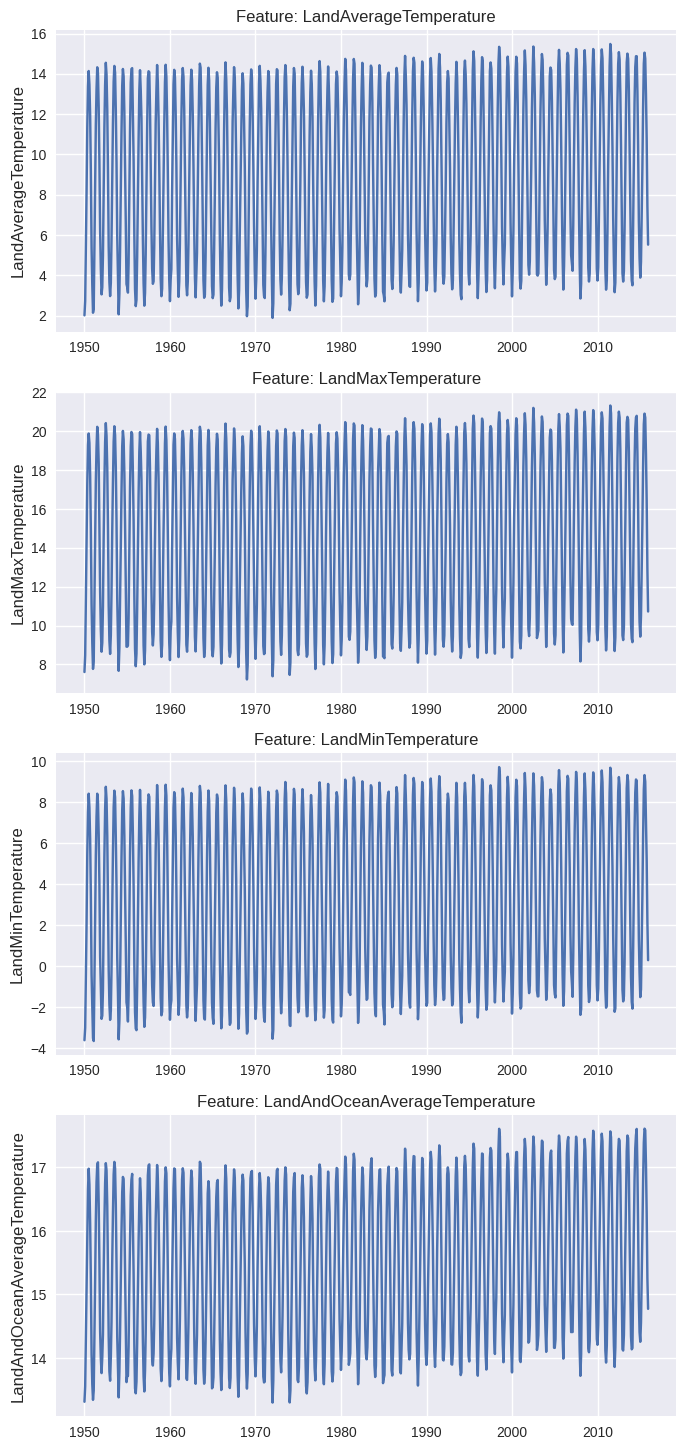

In [ ]:
f, ax = plt.subplots(nrows=len(COLS), ncols=1, figsize=(8, 18))

for i, col in enumerate(COLS):
  sns.lineplot(x=df.date, y=df[col].fillna(np.inf), ax=ax[i])
  ax[i].set_title(f'Feature: {col}', fontsize=12)
  ax[i].set_ylabel(ylabel=f'{col}', fontsize=12)
  ax[i].set_xlabel('')

We can see an overall trend moving upward. No visible data dropouts.

**Missing Data**

In [ ]:
df.isna().value_counts()

index  dt     LandAverageTemperature  LandMaxTemperature  LandMinTemperature  LandAndOceanAverageTemperature  date 
False  False  False                   False               False               False                           False    792
dtype: int64

Set has no missing data.

**Resampling**

Time intervals are already at monthly target.

In [ ]:
df.shape

(792, 7)

Ready for time series modeling.

---

**LSTM Modeling**

---

**Extract single datapoint**

In [ ]:
input = pd.DataFrame(list(df['LandAndOceanAverageTemperature']), index = df['date'], columns=['temp'])

**For multivariate, move date into index and retain fields**

In [ ]:
df.set_index('date', inplace=True)


In [ ]:
df.drop(['index','dt'],axis=1,inplace=True)

In [ ]:
input = df
input.head(2)

,LandAverageTemperature,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature
date,,,,
1950-01-01,2.008,7.611,-3.622,13.311
1950-02-01,2.721,8.475,-3.013,13.554


**Build model**

In [ ]:
# Load model class
%run -i "./Model_LSTM_v2.ipynb"

In [ ]:
# Use default balanced scale from -1..1 for better network training
model = ModelLSTMv2(input, test_ratio=TEST_RATIO, num_epochs=1, debug=debug)

### Building ModelLSTMv2::


**Scale and prepare data**

In [ ]:
# Determine data types in given columns
floats,ints,strings,other = get_df_types(input)

In [ ]:
target_label = 'LandAndOceanAverageTemperature'
WINDOW_SIZE = 30

In [ ]:
numerics = set(floats).union(set(ints))
alphas = set(strings).union(set(other))

In [ ]:
X = []

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()

In [ ]:
# Numericize non-numerics
for alpha_col in alphas:
  if debug:
    print(f'Label encoding col: {alpha_col}')
  X.append(label_enc.fit_transform(input[alpha_col].values))

In [ ]:
# Scale each numeric type
for numeric_col in numerics:
  if debug:
    print(f'## Scaling {numeric_col}')
  # Create new scaler for this column
  scaler = MinMaxScaler(feature_range=(-1,1))
  # Scale just this column and add to X
  X.append(scaler.fit_transform(input[numeric_col].values.reshape(-1, 1)))

  # Save the target scaler for later decoding
  if numeric_col == target_label:
    target_scaler = scaler

## Scaling LandMaxTemperature
## Scaling LandMinTemperature
## Scaling LandAndOceanAverageTemperature
## Scaling LandAverageTemperature


In [ ]:
if debug and not target_scaler:
  print('### WARNING: Target scaler not populated!')

In [ ]:
# Convert to numpy arrays
X = np.asanyarray(X)

In [ ]:
X.shape

(4, 792, 1)

In [ ]:
input.shape

(792, 4)

In [ ]:
X = []
y = []
# Move window through training data - each block of input X has a single supervised target y
for i in range(input.shape[0] - WINDOW_SIZE):
    X.append(input[i:i+WINDOW_SIZE])
    y.append(input[target_label][i+WINDOW_SIZE])

In [ ]:
# convert to np arrays
X = np.asanyarray(X, dtype=np.float32)
y = np.asanyarray(y, dtype=np.float32)

In [ ]:
X.shape

(762, 30, 4)

In [ ]:
# Split into train/test
NUM_TEST = math.floor(X.shape[0] * TEST_RATIO)
NUM_TRAIN = X.shape[0] - NUM_TEST

In [ ]:
NUM_TRAIN

534

In [ ]:
X_train = X[:NUM_TRAIN,:,:]
X_test = X[NUM_TRAIN:,:,:]
y_train = y[:NUM_TRAIN]
y_test= y[NUM_TRAIN:]

if debug:
  print(f'X_train, y_train: {X_train.shape}, {y_train.shape}')

X_train, y_train: (534, 30, 4), (534,)


In [ ]:
from keras.callbacks import ModelCheckpoint, TensorBoard, Callback, EarlyStopping
early_stop = EarlyStopping(monitor = "loss", mode = "min", patience = 7)
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(30,1)))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(30))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(Bidirectional(LSTM(128, activation='relu')))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

In [ ]:
X_train.shape

(534, 30, 4)

In [ ]:
model_hist = model.fit(X_train, y_train, epochs=1, verbose=1, callbacks = [early_stop] )


ValueError: ignored

---

## Pick back up here once everything works

---

In [ ]:
model.prep()

### After scaling data type is: <class 'numpy.ndarray'>
X_train, y_train: (555, 30, 1), (555, 1)


**Train model**

In [ ]:
model.train()

18/18 [==============================] - 17s 365ms/step - loss: 0.3352


In [ ]:
# Save model
model.save_model(SCRIPT_PATH)

Saving model to: /content/drive/MyDrive/data606/src/20230924-1445-LSTMv1.hdf5


**Run prediction**

7/7 [==============================] - 1s 26ms/step


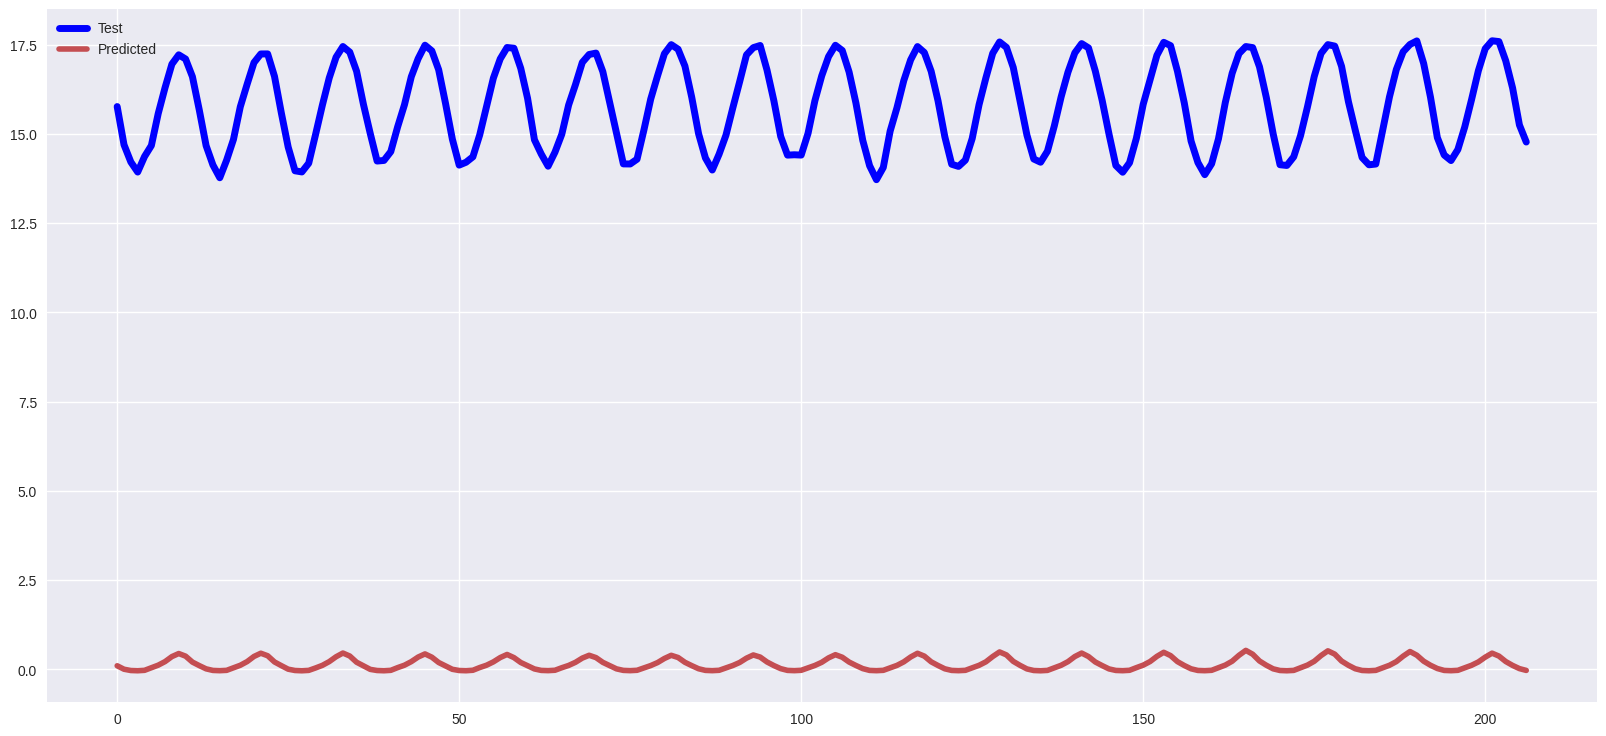

MSE: 246.1058840596732


In [ ]:
model.predict()